# European languages

# data

- [data.csv](https://github.com/wdbm/languages/blob/master/data.csv)

# references

- <https://en.wikipedia.org/wiki/Languages_of_the_European_Union#Knowledge>
- [Europeans and Their Languages -- Special Eurobarometer 386 / Wave EB77.1 Special Eurobarometer, 2012-06](http://ec.europa.eu/commfrontoffice/publicopinion/archives/ebs/ebs_386_en.pdf)

In [1]:
import pandas as pd

data = pd.read_csv("data.csv", delimiter = ",")

data

,country,population,English,French,German,Spainish,Russian,Italian,Polish
0,Germany,64409146,56,15,98,4,6,3,1
1,Italy,51862391,34,16,5,11,0,97,0
2,United Kingdom,51848010,97,19,9,8,2,2,1
3,France,47756439,39,97,8,13,0,5,1
4,Spain,39127930,22,12,2,98,0,2,0
5,Poland,32413735,33,4,19,1,26,2,99
6,Romania,18246731,31,23,7,5,3,7,0
7,Netherlands,13371980,90,29,71,5,0,2,0
8,Czech Republic,9012443,27,1,15,1,13,1,2
9,Belgium,8939546,38,81,23,5,1,4,0


# language correlations

In [2]:
data.corr()

,population,English,French,German,Spainish,Russian,Italian,Polish
population,1.000000,-0.115548,0.184915,0.057235,0.352084,-0.226547,0.230903,0.170896
English,-0.115548,1.000000,-0.004971,0.294240,-0.232710,-0.258460,0.036899,-0.178720
French,0.184915,-0.004971,1.000000,0.131126,0.055318,-0.318392,0.002619,-0.128571
German,0.057235,0.294240,0.131126,1.000000,-0.175518,-0.148437,-0.161343,-0.057373
Spainish,0.352084,-0.232710,0.055318,-0.175518,1.000000,-0.178545,-0.014994,-0.082364
Russian,-0.226547,-0.258460,-0.318392,-0.148437,-0.178545,1.000000,-0.203087,0.220810
Italian,0.230903,0.036899,0.002619,-0.161343,-0.014994,-0.203087,1.000000,-0.084138
Polish,0.170896,-0.178720,-0.128571,-0.057373,-0.082364,0.220810,-0.084138,1.000000


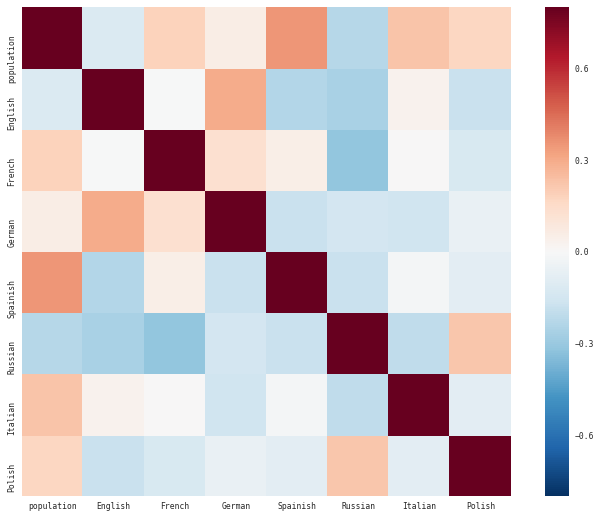

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(context = "paper", font = "monospace")

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), vmax = .8, square = True)

In [4]:
data_drop_population = data[[column for column in data.columns if column != "population"]]

data_drop_population.corr()

,English,French,German,Spainish,Russian,Italian,Polish
English,1.000000,-0.004971,0.294240,-0.232710,-0.258460,0.036899,-0.178720
French,-0.004971,1.000000,0.131126,0.055318,-0.318392,0.002619,-0.128571
German,0.294240,0.131126,1.000000,-0.175518,-0.148437,-0.161343,-0.057373
Spainish,-0.232710,0.055318,-0.175518,1.000000,-0.178545,-0.014994,-0.082364
Russian,-0.258460,-0.318392,-0.148437,-0.178545,1.000000,-0.203087,0.220810
Italian,0.036899,0.002619,-0.161343,-0.014994,-0.203087,1.000000,-0.084138
Polish,-0.178720,-0.128571,-0.057373,-0.082364,0.220810,-0.084138,1.000000


# language inability correlations

## complete language inability (0%)

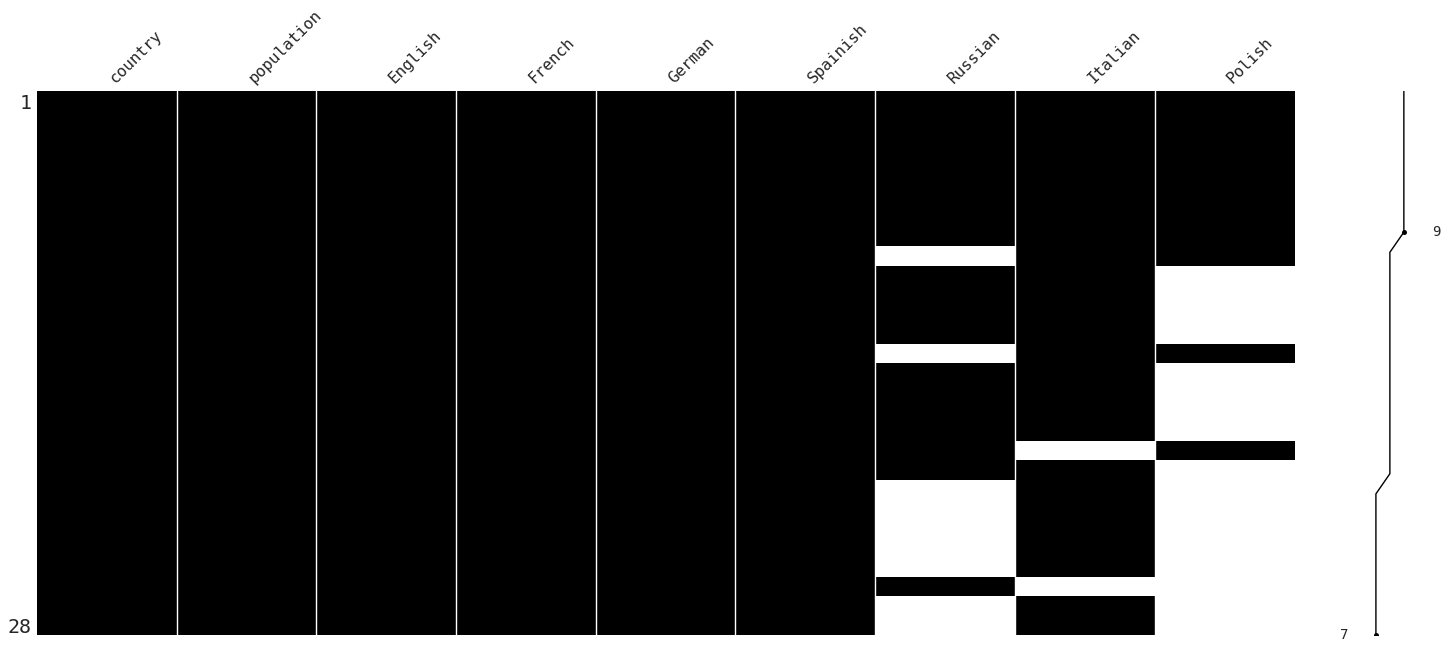

In [5]:
import missingno
import numpy as np

# replace all 0% abilities with null
data_with_null_values = data.replace(to_replace = 0, value = np.nan)
data_with_null_values_sorted = missingno.nullity_sort(data_with_null_values, sort = "descending")

missingno.matrix(data_with_null_values_sorted, color = (0, 0, 0))

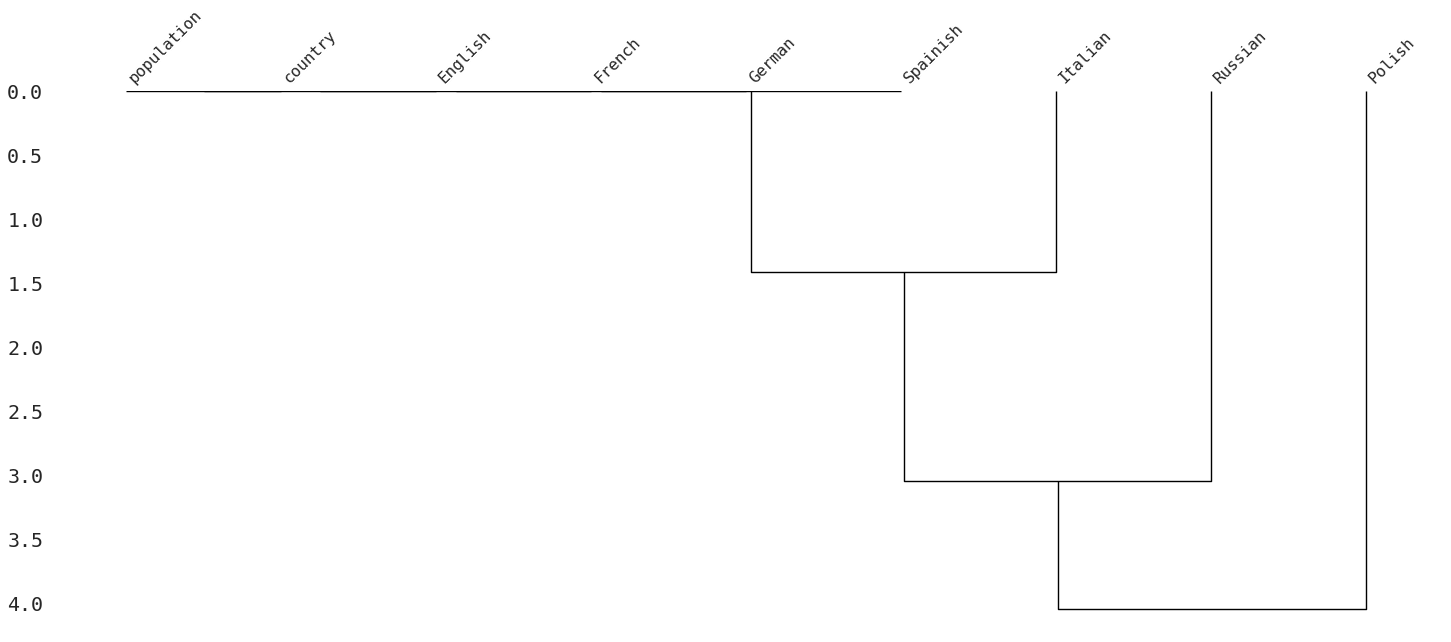

In [6]:
missingno.dendrogram(data_with_null_values)

## language inability < 10%

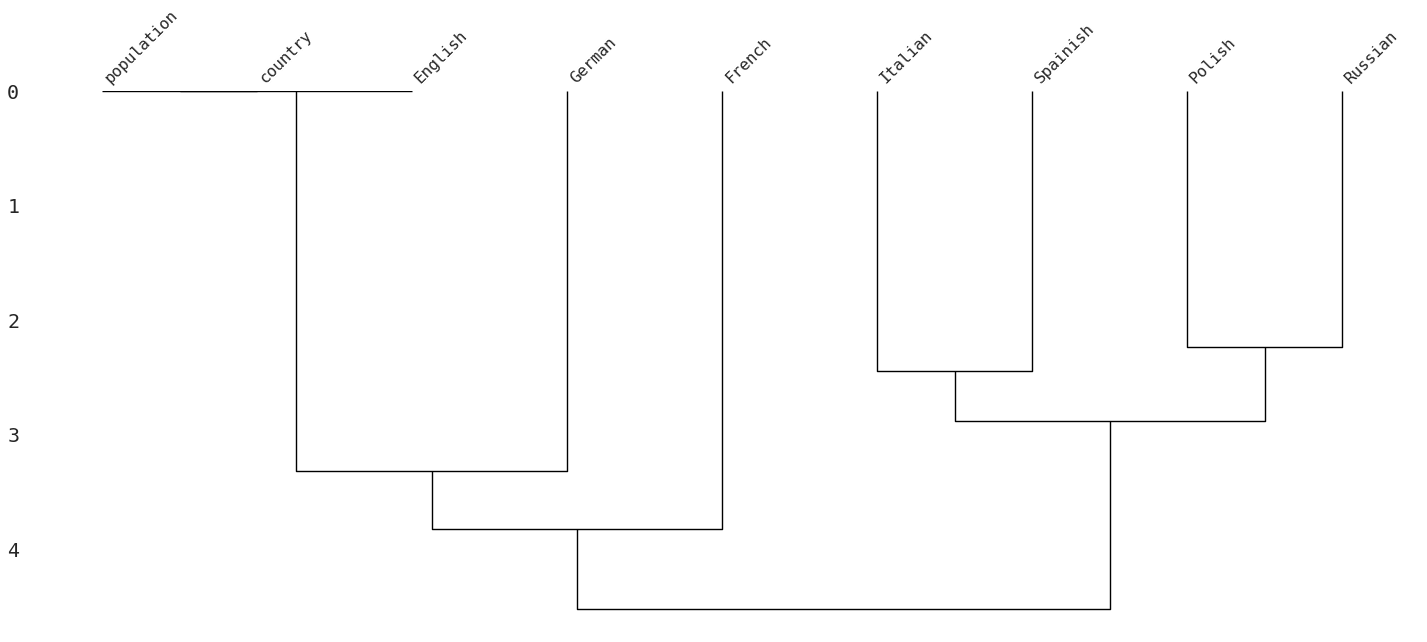

In [7]:
data = pd.read_csv("data.csv", delimiter = ",")

# replace all < 10% abilities with null
data[data.drop("population", axis = 1) < 10] = np.nan

missingno.dendrogram(data)

## language inability < 90%

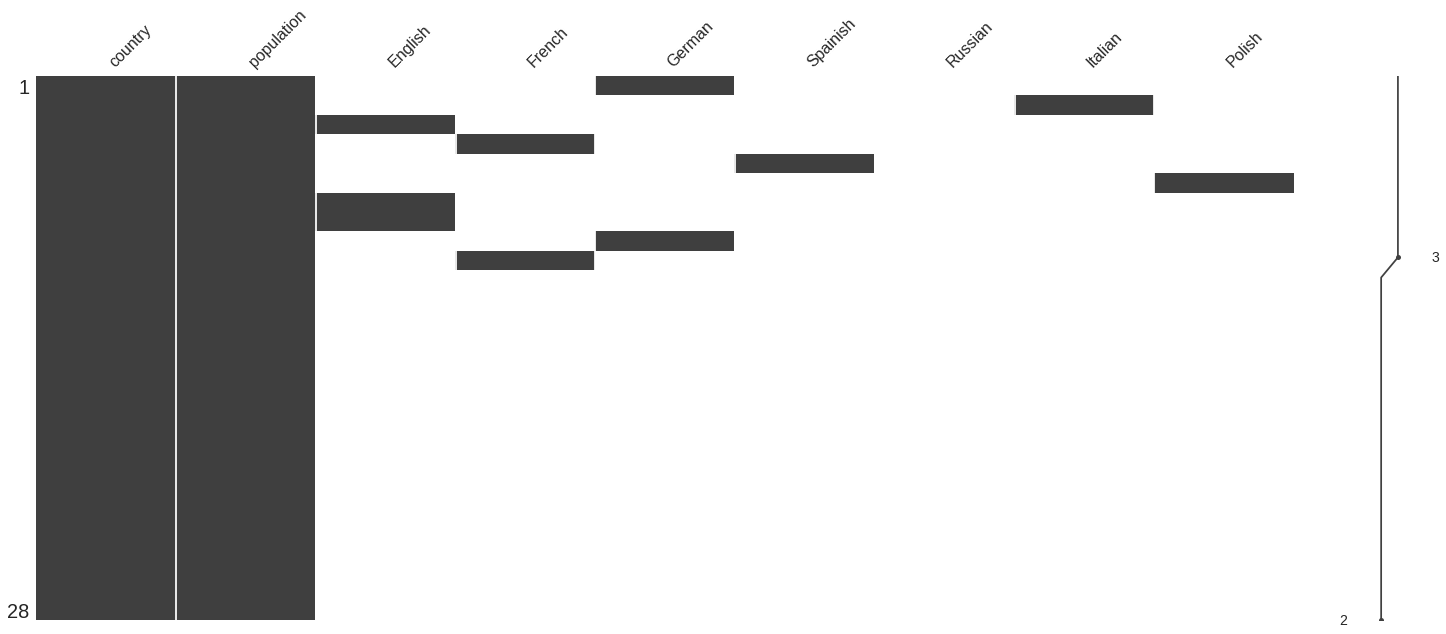

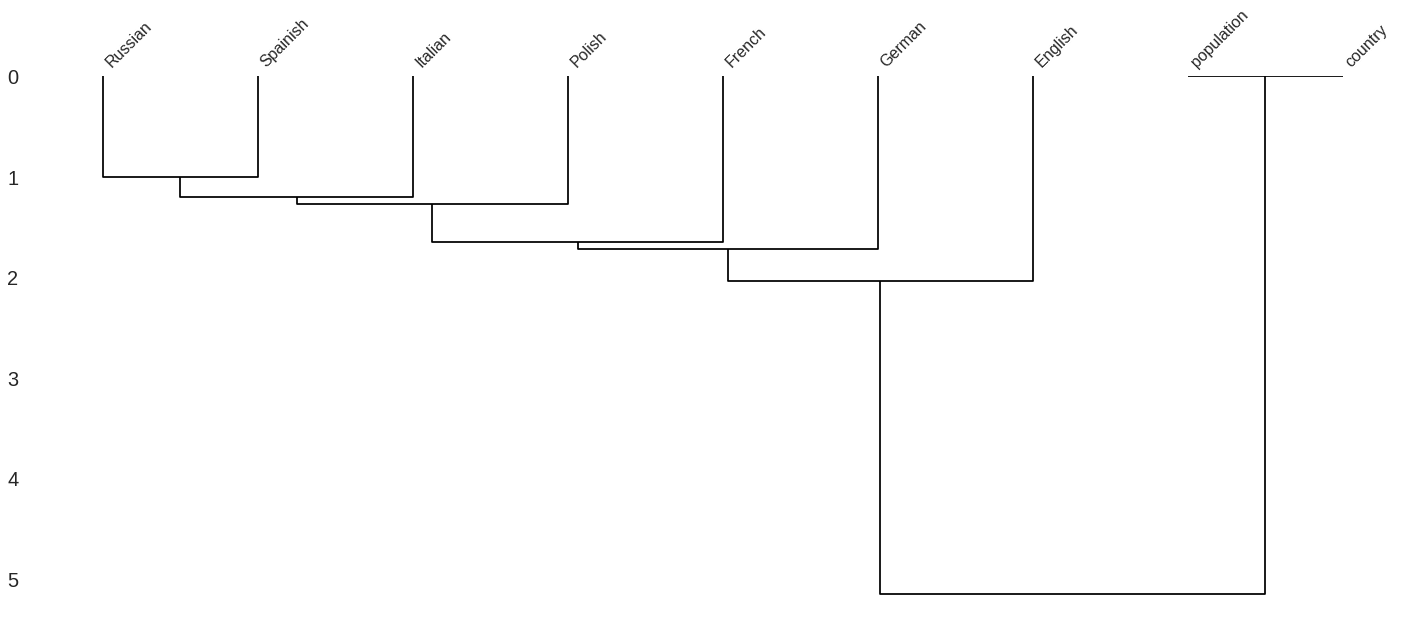

In [14]:
data = pd.read_csv("data.csv", delimiter = ",")

# replace all < 90% abilities with null
data[data.drop("population", axis = 1) < 90] = np.nan

missingno.matrix(missingno.nullity_sort(data, sort = "descending"))
missingno.dendrogram(data)

# histograms

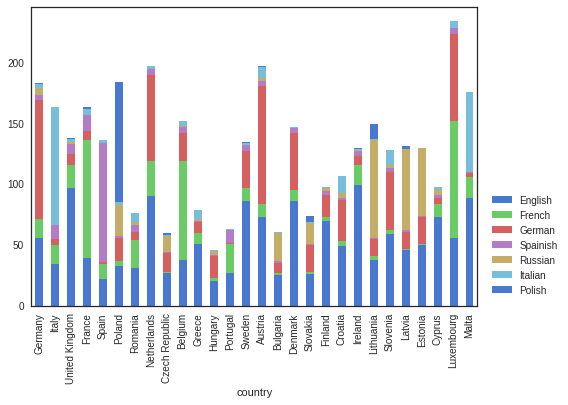

In [9]:
data = pd.read_csv("data.csv", delimiter = ",")

sns.set(color_codes = True)
sns.set(style = "white", palette = "muted")

data.drop("population", axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.4))

## exclude Russian

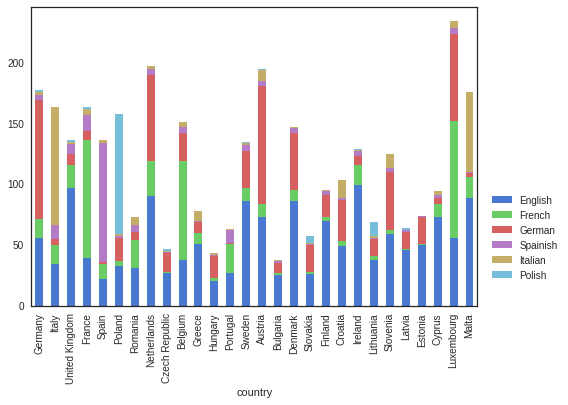

In [10]:
data.drop(["population", "Russian"], axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.4))

# exclude Russian and German

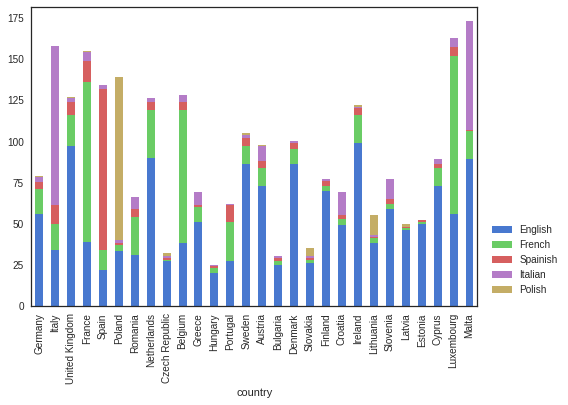

In [11]:
data.drop(["population", "Russian", "German"], axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.3))

# include Brexit, exclude Russian and German, sort by English and French ability

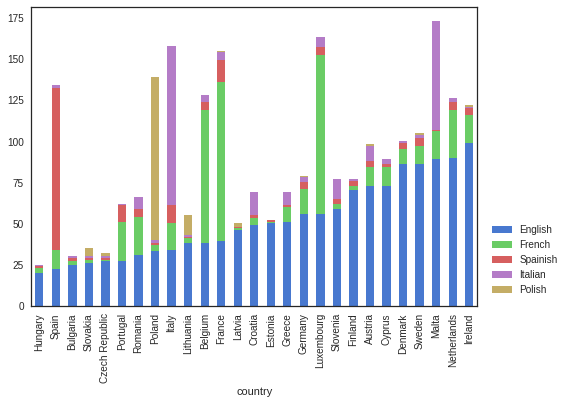

In [12]:
data = data[data.country != "United Kingdom"]

data = data.sort_values(by = ["English", "French"], ascending = True)

data.drop(["population", "Russian", "German"], axis = 1).plot("country", kind = "bar", stacked = True).legend(bbox_to_anchor = (1.2, 0.3))